# Fourier Identities

In [1]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In this notebook, we'll explore some handy identities associated with the Fourier transform:

$\tilde{g} (f) \equiv \int_{-\infty}^{\infty} g(t) e^{-i 2 \pi ft} dt$

and its inverse:

$g(t) \equiv \int_{-\infty}^{\infty} \tilde{g} (f) e^{i 2 \pi ft} df$.

## The Fourier transform of a Gaussian

The Gaussian function is given by

$g(t) = \frac{1}{\sqrt{2 \pi a^2}}\exp \left[-\frac{(t-b)^2}{2 a^2}\right]$,

and is charaterized by two parameters, the location $b$ of its peak, and its width $a$ (rigorously, this width is defined as the standard deviation of the curve). Because of the way Gaussians look, they're often also known as Bell curves:

In [2]:
def gauss(t,a,b):
    exponent = -(t-b)**2
    exponent /= 2*a**2
    return np.exp(exponent)/np.sqrt(2.*np.pi*a**2)

(-0.2, 1.2)

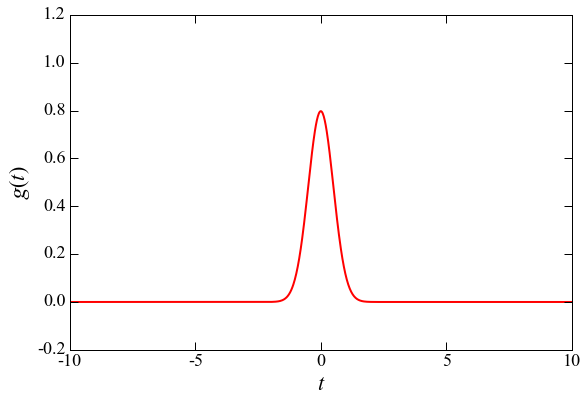

In [3]:
t_coords = np.linspace(-10.,10.,1025)[:-1]

f, ax = plt.subplots(figsize=(9,6))
ax.plot(t_coords,gauss(t_coords,0.5,0.),lw=2,c='red')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$g(t)$")
ax.set_ylim(-0.2, 1.2)

<b> Q1. What is the Fourier transform of a Gaussian that is centered on the origin?

<b> Solution:

In [4]:
def plot_all_fourier(f_coords,fourier,xlims=None):
    f, ax = plt.subplots(figsize=(9,6))
    ax.plot(f_coords,fourier.real,lw=2,c='red',label="Real")
    ax.plot(f_coords,fourier.imag,lw=2,c='blue',label="Imaginary")
    ax.plot(f_coords,abs(fourier),lw=2,c='black',label="Magnitude")
    ax.set_ylabel(r"$\tilde{g}(f)$")
    ax.set_xlabel(r"$f$")
    ax.legend(loc='best')
    if xlims != None:
        ax.set_xlim(xlims)

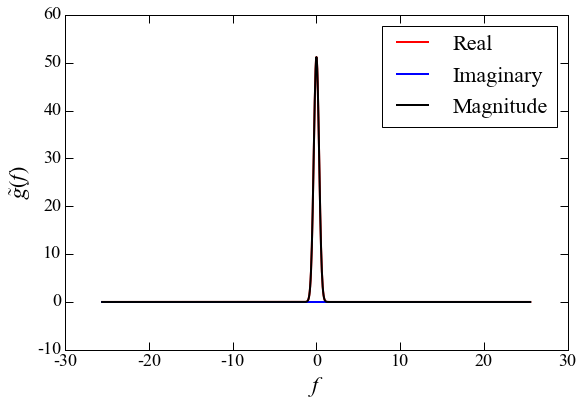

In [5]:
t_sep = t_coords[1] - t_coords[0]
f_coords = np.fft.fftshift(np.fft.fftfreq(len(t_coords),d=t_sep))
gausstilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss(t_coords,0.5,0.))))

plot_all_fourier(f_coords,gausstilde)

The Fourier transform of a Gaussian also looks like a Gaussian! In fact, one can show on pencil and paper that this is exactly true.

## Handy properties

<b> Q2. If one compresses $g(t)$ horizontally by some factor, what happens to its Fourier transform $\tilde{g} (f)$?

<b> Solution:

Above we took the Fourier transform of a Gaussian of width $a=0.5$. Let's try a Gaussian of width $a=0.05$

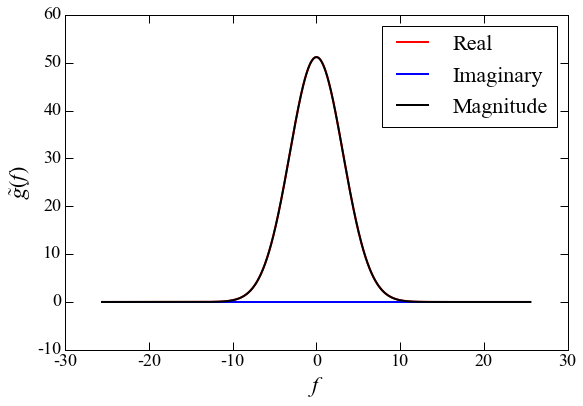

In [6]:
t_sep = t_coords[1] - t_coords[0]
f_coords = np.fft.fftshift(np.fft.fftfreq(len(t_coords),d=t_sep))
gausstilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(gauss(t_coords,0.05,0.))))

plot_all_fourier(f_coords,gausstilde)

One sees that scaling the width of the original function by a factor of $r$ causes the width of its Fourier transform to scale by a factor of $1/r$. Here, we compressed $g(t)$ by a factor of $10$, so $\tilde{g}(f)$ got stretched out by a factor of $10$.

<b> Q3. If $g(t)$ is multiplied by some factor, what happens to $\tilde{g}(f)$?

<b> Solution:

Let's just multiply our last example by $2$ before Fourier transforming:

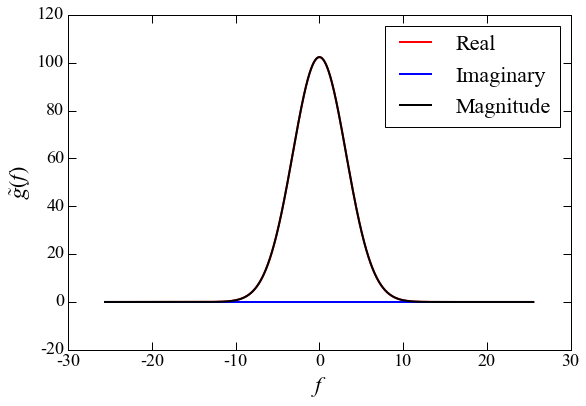

In [7]:
t_sep = t_coords[1] - t_coords[0]
f_coords = np.fft.fftshift(np.fft.fftfreq(len(t_coords),d=t_sep))
gausstilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(2.*gauss(t_coords,0.05,0.))))

plot_all_fourier(f_coords,gausstilde)

Comparing the vertical axes we see that multiplying $g(t)$ by $r$ caused $\tilde{g} (\omega)$ to be multiplied by $r$. In slightly fancier mathematical terminology, we say that this is because the Fourier transform is a <b> linear </b> operation.

<b> Q4. Suppose $g(t)$ is real, but not necessarily even or odd. Without knowing any more about its functional form, are there any symmetries you notice its Fourier transform?

<b> Solution:

As a test function, let's try $g(t) = (t+3t^2) \exp(-3|t|)$

In [8]:
test_array = t_coords + 3.*t_coords**2
test_array *= np.exp(-3.*abs(t_coords))

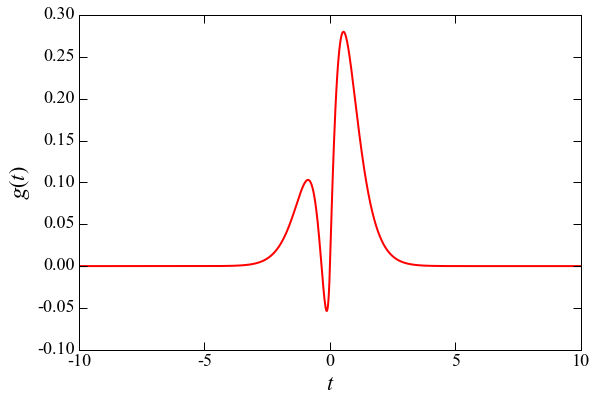

In [9]:
f, ax = plt.subplots(figsize=(9,6))
ax.plot(t_coords,test_array,lw=2,c='red')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$g(t)$")


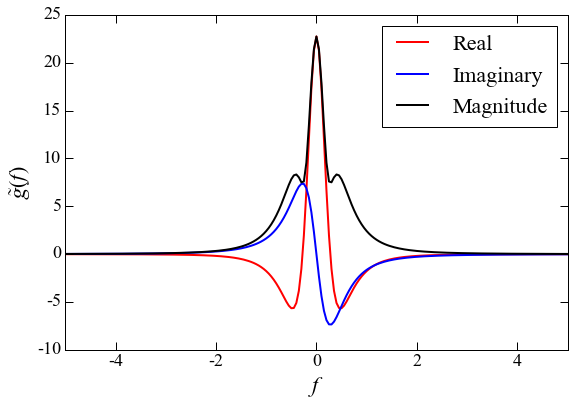

In [10]:
t_sep = t_coords[1] - t_coords[0]
f_coords = np.fft.fftshift(np.fft.fftfreq(len(t_coords),d=t_sep))
test_array_tilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(test_array)))

plot_all_fourier(f_coords,test_array_tilde,xlims=(-5,5))

Notice that the real part of the $\tilde{g} (f)$ is symmetric (i.e., it is an even function), while the imaginary part is antisymmetric (i.e., it is an odd function). This turns out to be the case whenever $g(t)$ is real.

This exercise answers some outstanding questions from our last notebook:
* The negative frequencies in $\tilde{g} (f)$ were needed because otherwise we would be violating these symmetry properties and the original sound clip (i.e., $g(t)$) would not be real-valued.
* Had we been careless when we filtered our sound clips and not preserved the symmetries seen here, we would have ended up with a sound clip that wasn't real-valued.

Another helpful way to express the results here is to say that if $g(t)$ is real, then the strength of a negative frequency components must be the complex conjugate of its corresponding positive frequency component. In other "words", $\tilde{g} (-f) = \tilde{g}^* (f)$ if $g(t)$ is real.

These properties can all be proven on "pencil and paper" using Euler's identity $e^{i \theta} \equiv \cos \theta + i \sin \theta$.

<b> Q5. Suppose that before we Fourier transform $g(t)$, we first multiply it by $\exp(i 2\pi \gamma t)$. What does this do to its Fourier transform?

<b> Solution:

Let's go back to our neighborhood friendly Gaussian as our example. We'll pick $\gamma=10$.

In [11]:
gamma = 10.
phased_gauss = np.exp(1j*2.*np.pi*gamma*t_coords) * gauss(t_coords,0.5,0.)

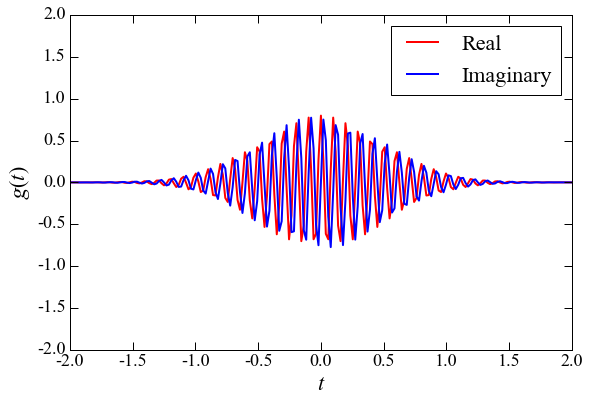

In [13]:
t_coords = np.linspace(-10.,10.,1025)[:-1]

f, ax = plt.subplots(figsize=(9,6))
ax.plot(t_coords,phased_gauss.real,lw=2,c='red',label='Real')
ax.plot(t_coords,phased_gauss.imag,lw=2,c='blue',label='Imaginary')
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$g(t)$")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.legend(loc='best')

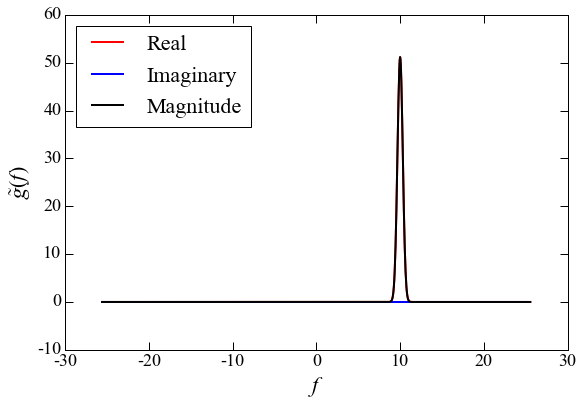

In [14]:
t_sep = t_coords[1] - t_coords[0]
omega_coords = np.fft.fftshift(np.fft.fftfreq(len(t_coords),d=t_sep))
phased_gauss_tilde = np.fft.fftshift(np.fft.fft(np.fft.fftshift(phased_gauss)))

plot_all_fourier(f_coords,phased_gauss_tilde)

It appears that the effect of multiplying by this complex phase factor is to shift $\tilde{g}(f)$ by exactly $\gamma$! Mathematically, if $\tilde{g} (f)$ is the Fourier transform of $g(t)$, then $\tilde{g}(f-\gamma)$ is the Fourier transform of $\exp(i 2\pi \gamma t) f(t)$.